In [1]:
import nltk
import pandas as pd
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import community

In [2]:
df = pd.read_csv('cleaned_data6.csv')


In [3]:
df['Sentiment'] = ''
df['Sentiment_Polarity'] = 0.0

for index, row in df.iterrows():
    text = row['Comment']
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    df.at[index, 'Sentiment_Polarity'] = sentiment  # Store polarity score

    if sentiment > 0:
        sentiment_label = "Positive"
    elif sentiment < 0:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    df.at[index, 'Sentiment'] = sentiment_label
df[['Comment', 'Sentiment', 'Sentiment_Polarity']]



,Comment,Sentiment,Sentiment_Polarity
0,"['frosted', 'blue', 'look', 'better', 'naked',...",Positive,0.166667
1,"['iphone', 'model', 'mysteriously', 'turning',...",Neutral,0.000000
2,"['iphone', '15']",Neutral,0.000000
3,"['update', '', 'thanks', 'affirming', 'regret'...",Positive,0.066667
4,['dimming'],Neutral,0.000000
...,...,...,...
2275,"['best', 'way', 'get', '15', 'pro', 'max', '',...",Positive,1.000000
2276,"['custom', 'keyboard', 'ha', 'resize', 'option...",Neutral,0.000000
2277,"['youtube', '', 'keep', 'playing', 'phone', 'l...",Neutral,0.000000
2278,"['iphone', '15', 'refresh', 'rate']",Neutral,0.000000


In [4]:
positive_comments = df[df['Sentiment'] == 'Positive']
negative_comments = df[df['Sentiment'] == 'Negative']

average_positive_polarity = positive_comments['Sentiment_Polarity'].mean()
average_negative_polarity = negative_comments['Sentiment_Polarity'].mean()

print("Average Positive Polarity:", average_positive_polarity)
print("Average Negative Polarity:", average_negative_polarity)

Average Positive Polarity: 0.34458053376022124
Average Negative Polarity: -0.3152955433455434


In [5]:
df.to_csv('reddit_comments_with_sentiment.csv', index=False)

In [6]:
B = nx.Graph()

authors = set(df['Author'])
sentiments = set(df['Sentiment']) 


B.add_nodes_from(authors, bipartite=0)  
B.add_nodes_from(sentiments, bipartite=1)  

# Add edges connecting authors to sentiments based on the sentiment category
for index, row in df.iterrows():
    author = row['Author']
    sentiment = row['Sentiment']
    
    
    if author in authors and sentiment in sentiments:
        B.add_edge(author, sentiment)


print("Number of nodes:", B.number_of_nodes())
print("Number of edges:", B.number_of_edges())

Number of nodes: 1849
Number of edges: 1984


In [7]:

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

def node_adder(g, comment, parent_author):
    if comment['Author'] is not None:
        if comment['Author'] not in g.nodes():
            g.add_node(comment['Author'], sentiment=get_sentiment(comment['Text']))

        g.add_edge(comment['Author'], parent_author)

        for reply in comment['Replies']:
            node_adder(g, reply, comment['Author'])

# Read the data from the CSV file
hot_posts = pd.read_csv('data1.csv')

# Initialize an empty graph
g = nx.Graph()

# Set the threshold for comments you want to consider
breadthCommentCount = 10

for i, post in hot_posts.iterrows():
    if post['Author'] is not None:
        print(post['Author'], "-", post['Comment'])
        post_comment_limit = min(breadthCommentCount, post['Number of Comments'])

        if post['Author'] not in g.nodes:
            g.add_node(post['Author'], sentiment=get_sentiment(post['Comment']))

        for comment in post['Comment']:
            if isinstance(comment, dict):
                node_adder(g, comment, post['Author'])

SkylarMLO - The frosted blue looks better to the naked eye than in the photos
vinaylovestotravel - Some iPhone Models Are Mysteriously Turning Themselves Off At Night
Miserable_Impact_431 - Iphone 15
nan - Update: Thanks for affirming my regrets! Returned the yellow and bought the blue.
Cr1msonZ - Dimming
Flucky_ - Did Apple fix the wireless charging issue?
sticky__toffee - I know nothing go about software development but a question on the side notch/silent button.
alex9005 - How much storage did you go for on your iPhone 15/15 Plus ?
BigBrandyy - What wall adaptor should I use with the stock iPhone 15 plus box USB C cable??
rollmefurtherbtch - Night sky shots with a tripod
jochelu - CarPlay iPhone 15 fail
Ghostek-Official - iPhone 15 Pro Max - Titanium Blue
Joshman1231 - This new iOS 17.0.3 bricked my phone
Admirable-Gas-7876 - iPhone 15 Pro Max - Natty
natoushh121 - iPhone 15 Charging Issue
alex9005 - This is one good looking phone
KristopherJC - Charging stand that works with case?


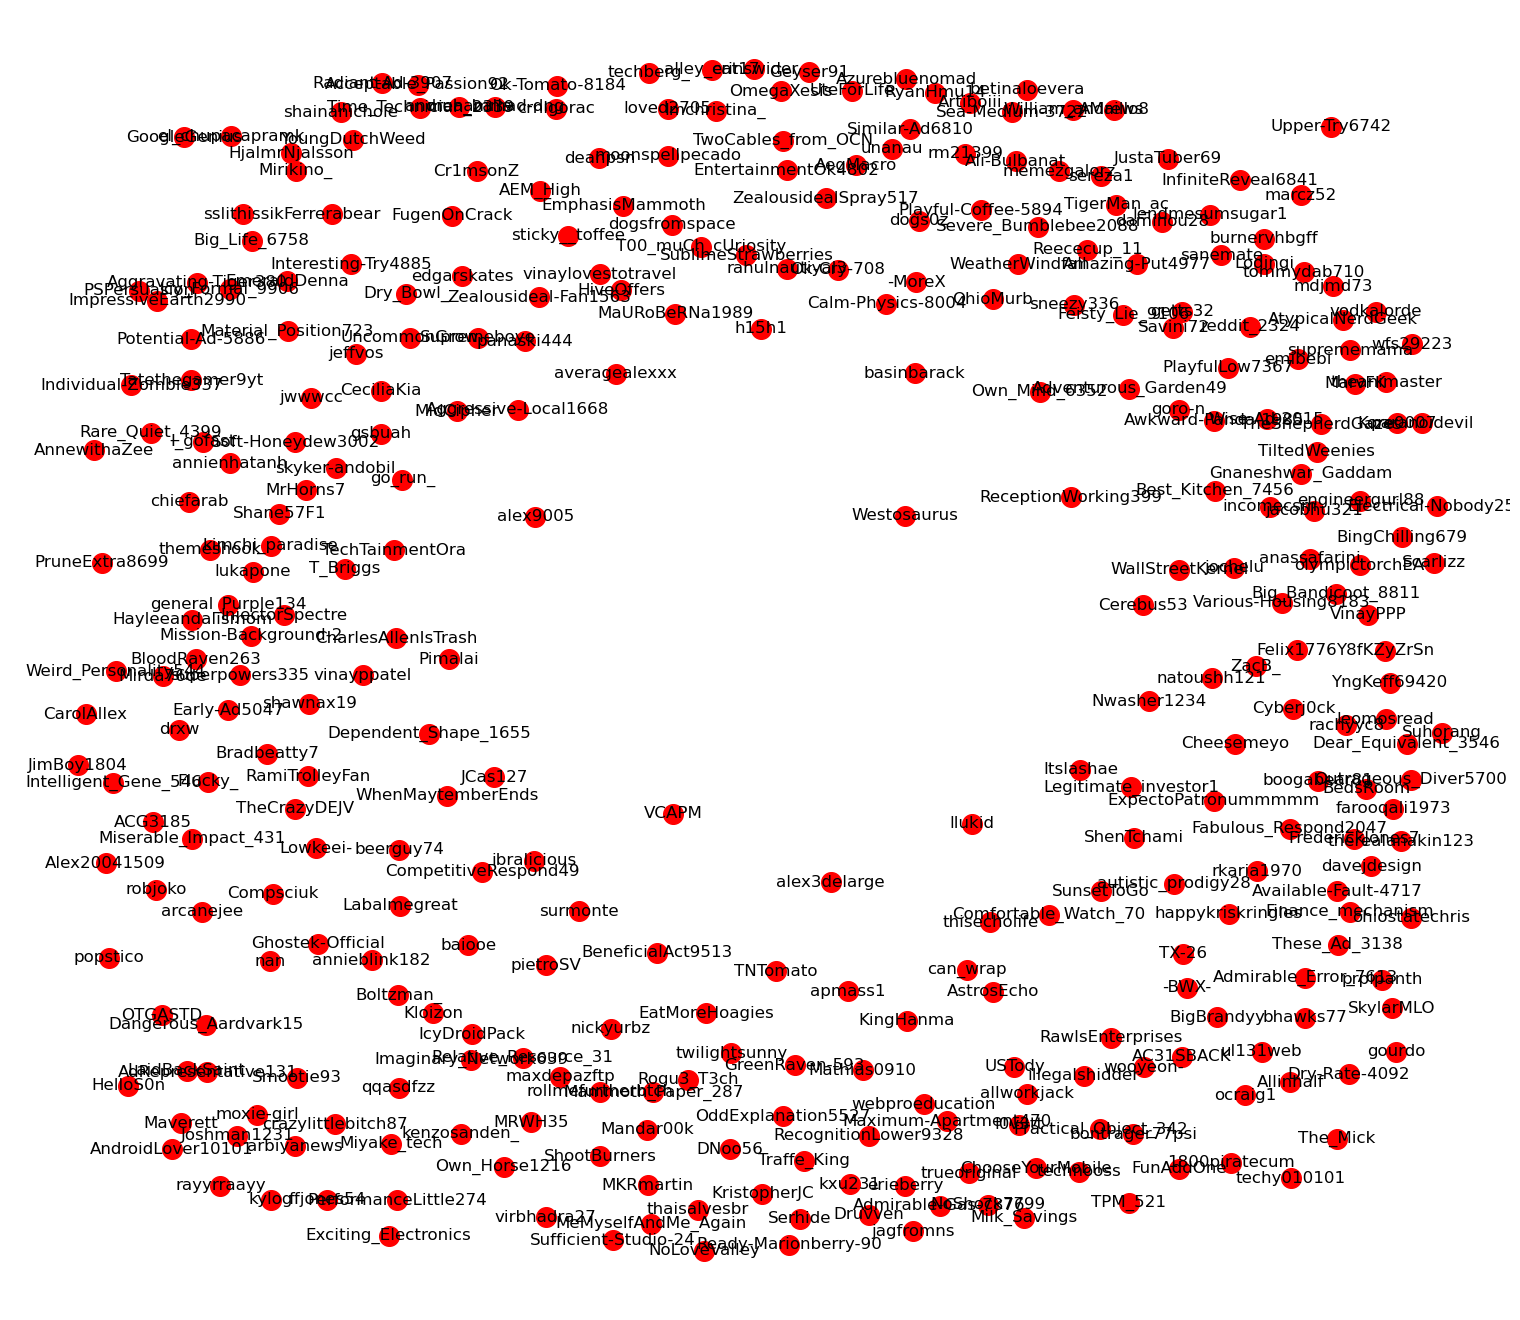

In [8]:

plt.figure(figsize=(15,13))

pos = nx.spring_layout(g, scale=200, iterations=5, k=0.5)

nx.draw(g, pos, node_color='red', width=1, with_labels=True, node_size=200)
plt.show()


In [9]:
partition = community.best_partition(B)
partition

{'electronic-refuse388': 0,
 'ustody': 1,
 'emibebi': 0,
 'zealousideal-fan1563': 1,
 'livemarionberry3694': 0,
 'immortaldemondst': 1,
 'powerread': 2,
 'trimshot': 1,
 'seashells46': 0,
 'nick6468': 0,
 'slimeqslimeball': 0,
 'noxharsha': 0,
 'soft-honeydew3002': 2,
 'josephwang123': 1,
 'both-independent9493': 0,
 'impressiveearth2990': 0,
 'rosso-rosso': 2,
 'naples98': 0,
 'darksun91': 0,
 'zealousideal-top6671': 0,
 'wooyeon-': 0,
 'dumbledayum': 0,
 'wisetitan85': 1,
 'techberg_': 1,
 'benrjp': 0,
 'grundorson': 1,
 'comacow02': 2,
 'own_horse1216': 0,
 'issam2204': 0,
 'dakk33': 1,
 'twotwocargarage': 0,
 'olympicbroil': 0,
 'kscarx': 0,
 'various-housing8183': 0,
 'i_dont_lie_much': 1,
 'flipflamtap': 0,
 'hashmob____________': 1,
 'edvva': 0,
 'ferrerabear': 0,
 'wtf1harro': 0,
 'quasidas': 2,
 'redditorsurfinreddit': 0,
 'fabrictm': 0,
 'nick26gamer': 0,
 'lord___boros': 0,
 'yt_5stargames': 1,
 'petalesdejuin': 2,
 'thegreatchoochoo': 1,
 'snoomarzipans2945': 1,
 'dpbge': 0

In [10]:
threshold = 10 
anomalous_nodes = [node for node, comm in partition.items() if list(partition.values()).count(comm) < threshold]
anomalous_nodes

[]

In [11]:
degree_dict = dict(B.degree(B.nodes()))
nx.set_node_attributes(B, degree_dict, 'degree')

# Betweenness Centrality
betweenness_dict = nx.betweenness_centrality(B)
nx.set_node_attributes(B, betweenness_dict, 'betweenness')

# Closeness Centrality
closeness_dict = nx.closeness_centrality(B)
nx.set_node_attributes(B, closeness_dict, 'closeness')

# Eigenvector Centrality (on the largest connected component)
largest_cc = max(nx.connected_components(B), key=len)
subgraph = B.subgraph(largest_cc)
eigenvector_dict = nx.eigenvector_centrality(subgraph, max_iter=1000)
for node in B.nodes():  # Propagate the values to the main graph (B)
    if node in eigenvector_dict:
        B.nodes[node]['eigenvector'] = eigenvector_dict[node]
    else:
        B.nodes[node]['eigenvector'] = 0  

for node in B.nodes():
    node_data = B.nodes[node]
    degree = node_data.get('degree', 'N/A')
    betweenness = node_data.get('betweenness', 'N/A')
    closeness = node_data.get('closeness', 'N/A')
    eigenvector = node_data.get('eigenvector', 'N/A')

    print(f"Node: {node}")
    print(f"Degree: {degree}")
    print(f"Betweenness: {betweenness}")
    print(f"Closeness: {closeness}")
    print(f"Eigenvector: {eigenvector}")
    print("-" * 40)




Node: electronic-refuse388
Degree: 1
Betweenness: 0.0
Closeness: 0.3775280898876405
Eigenvector: 0.019713414714150453
----------------------------------------
Node: ustody
Degree: 2
Betweenness: 0.002542783561626711
Closeness: 0.45062179956108267
Eigenvector: 0.02241694697648401
----------------------------------------
Node: emibebi
Degree: 1
Betweenness: 0.0
Closeness: 0.3775280898876405
Eigenvector: 0.019713414714150453
----------------------------------------
Node: zealousideal-fan1563
Degree: 1
Betweenness: 0.0
Closeness: 0.2892471435279386
Eigenvector: 0.0027035322623335566
----------------------------------------
Node: livemarionberry3694
Degree: 1
Betweenness: 0.0
Closeness: 0.3775280898876405
Eigenvector: 0.019713414714150453
----------------------------------------
Node: immortaldemondst
Degree: 1
Betweenness: 0.0
Closeness: 0.2892471435279386
Eigenvector: 0.0027035322623335566
----------------------------------------
Node: powerread
Degree: 1
Betweenness: 0.0
Closeness: 0.267

In [12]:
# Modularity
modularity = community.modularity(partition, B)
print(f"Modularity: {modularity}")

# Number of Communities
num_communities = len(set(partition.values()))
print(f"Number of Communities: {num_communities}")

# Community Size
community_sizes = {}
for community_id in set(partition.values()):
    community_sizes[community_id] = list(partition.values()).count(community_id)

print("Community Sizes:")
for community_id, size in community_sizes.items():
    print(f"Community {community_id}: {size} nodes")


Modularity: 0.4819224156152445
Number of Communities: 3
Community Sizes:
Community 0: 1128 nodes
Community 1: 483 nodes
Community 2: 238 nodes
